# [Programming assignment 3: Stance detection](http://www.cse.chalmers.se/~richajo/dit866/assignments/a3/assignment3.html)

In [174]:
# for handeling data
import pandas as pd

# for mathematical manipulation
import numpy as np

# the actual classification algorithm
from sklearn.svm import LinearSVC

# for converting training and test datasets into matrices
# TfidfVectorizer does this specifically for documents
from sklearn.feature_extraction.text import TfidfVectorizer

# for bundling the vectorizer and the classifier as a single "package"
from sklearn.pipeline import make_pipeline

# for splitting the dataset into training and test sets 
from sklearn.model_selection import train_test_split

# for evaluating the quality of the classifier
from sklearn.metrics import accuracy_score

In [215]:
# import the trtaining data
df_train = pd.read_csv('http://www.cse.chalmers.se/~richajo/dit866/assignments/a3/data/a3_train_final.tsv',
                 sep='\t', header=None, names=["sentiment","comment"])

df_test = pd.read_csv('http://www.cse.chalmers.se/~richajo/dit866/assignments/a3/data/a3_test_final.tsv',
                 sep='\t', header=None, names=["sentiment","comment"])
df_test["sentiment"]= df_test["sentiment"].apply(str)

# look at the data
df_train.head()

,sentiment,comment
0,0/-1,It is easier to fool a million people than it...
1,0/0,NATURAL IMMUNITY protected us since evolutio...
2,0/-1,NATURAL IMMUNITY protected us since evolutio...
3,1/1/1/-1,The bigest sideffect of vaccines is fewer dea...
4,1/1,Vaccine takes more than a year to develop. T...


We only like to keep the comments where all the sentiments agree, therefore we remove all the comments where all the sentiments don't agree.

In [216]:
# drop comments where the sentiments don't agree
l = [] # list with elements to drop
for i in range(len(df_train)):
    # get the ith sentiment and split it into a list 
    sentiment = df["sentiment"][i].split('/')
    
    # check if the all the elements are the same
    if all(s == sentiment[0] for s in sentiment) == False:
        # if all the elements are not the same we drop that row
        l.append(i)
    else:
        # if all the elements are the same we just pick one of them
        df_train["sentiment"][i] = sentiment[0]
df_train = df_train.drop(l);

In [217]:
# split into train and test datasets
Ytrain = df_train.iloc[:,0]
Xtrain = df_train.iloc[:,1]
Ytest = df_test.iloc[:,0]
Xtest = df_test.iloc[:,1]

In [201]:
import re

def preprocess_text(text):
    text = text.lower() # make lower case
    text = re.sub(r'\d+', '', text) # remove digits
    return text

pipeline = make_pipeline( 
    TfidfVectorizer(
        decode_error='strict',
        strip_accents='unicode',
        analyzer='word',
        min_df = 1,
        max_df = 0.8,
        ngram_range = (1,2),
        sublinear_tf = True,
        preprocessor=preprocess_text
    ), 
    LinearSVC(
        penalty='l2', 
        loss='squared_hinge', 
        max_iter=3000) 
)
pipeline.fit(Xtrain, Ytrain)

# corona vaccine comment classifier
acc = accuracy_score(Ytrain, pipeline.predict(Xtrain))
print("Accuracy =",acc)

Accuracy = 0.9992338232221216


In [181]:
#print(pipeline[0].get_feature_names())

In [202]:
pipeline_vanilla = make_pipeline( 
    TfidfVectorizer(), 
    LinearSVC() 
)
pipeline_vanilla.fit(Xtrain, Ytrain)

# corona vaccine comment classifier
acc = accuracy_score(Ytrain, pipeline_vanilla.predict(Xtrain))
print("Accuracy =",acc)

Accuracy = 0.9553527895799958


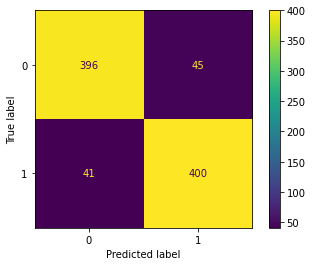

In [219]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

plot_confusion_matrix(pipeline, Xtest, Ytest) 

## Preliminary Sample

In [3]:
# import the data
df = pd.read_csv('http://www.cse.chalmers.se/~richajo/dit866/data/a3_first_sample.tsv',
                 sep='\t', header=None, names=["sentiment","comment"])

# look at the data
df.tail()

,sentiment,comment
970,0,"Thank you for the video, however instead of..."
971,0,Over my dead body will I get the vaccine or tr...
972,0,By CDC's own numbers recovery rates are higher...
973,1,"Alrhough I don't understand everything, at lea..."
974,0,WHAT ABOUT THE ONE'S DYING AT THEIR FIRST INJE...


We split the data into training and test sets. We use 20% of the data for testing. The `random_state` argument here is for reproducibility, to make sure we get the same train/test split each time we run the notebook, since `train_test_split` does the split randomly.

In [4]:
# split into train and test datasets
Ydata = df.iloc[:,0]
Xdata = df.iloc[:,1]
Xtrain, Xtest, Ytrain, Ytest = train_test_split(Xdata, Ydata, test_size=0.2, random_state=12345)

We create our pipeline

In [133]:
import re

def preprocess_text(text):
    text = text.lower() # make lower case
    text = re.sub(r'\d+', '', text) # remove digits
    return text


pipeline = make_pipeline( 
    TfidfVectorizer(
        decode_error='strict', 
        strip_accents='unicode',
        analyzer='word',
        min_df = 1,
        max_df = 0.8,
        ngram_range = (1,2),
        sublinear_tf = True,
        preprocessor=preprocess_text
    ), 
    LinearSVC(
        penalty='l2', 
        loss='squared_hinge', 
        max_iter=3000) 
)
pipeline.fit(Xtrain, Ytrain)

# corona vaccine comment classifier
acc = accuracy_score(Ytrain, pipeline.predict(Xtrain))
print("Accuracy =",acc)

Accuracy = 1.0


In [134]:
acc = accuracy_score(Ytest, pipeline.predict(Xtest))
print("Accuracy =",acc)

Accuracy = 0.7333333333333333


In [115]:
def vaccine_comment_classifier(X, Y):
    pipeline = make_pipeline( 
        TfidfVectorizer(), 
        LinearSVC() 
    )
    pipeline.fit(X, Y)
    return pipeline

In [116]:
clf = vaccine_comment_classifier(Xtrain, Ytrain)
# corona vaccine comment classifier
acc = accuracy_score(Ytrain, clf.predict(Xtrain))
print("Accuracy =",acc)

Accuracy = 0.9974358974358974


In [117]:
# book review classifier evaluated on book review test set
acc = accuracy_score(Ytest, clf.predict(Xtest))
print("Accuracy =",acc)

Accuracy = 0.7230769230769231


## Testing stuff

In [8]:
import re

def preprocess_text(text):
    text = text.lower() # make lower case
    text = re.sub(r'\d+', '', text) # remove digits
    return text

vect = TfidfVectorizer(decode_error='strict', 
                         strip_accents='unicode',
                         analyzer='word',
                         stop_words='english',
                         preprocessor=preprocess_text,
                         max_features=10000
                      )
vect.fit_transform(['👋 Welcome. hi there you and me are going to the super market lulz :) 123'])
print(vect.get_feature_names())

['going', 'hi', 'lulz', 'market', 'super', 'welcome']


In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
stop_words = stopwords.words('english');

# Create feature vectors
vectorizer = TfidfVectorizer(decode_error='strict', 
                             strip_accents='unicode',
                             analyzer='word',
                             stop_words=stop_words,
                             preprocessor=preprocess_text,
                             max_features=10000,
                             min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                            )

Xtrain_encoded = vectorizer.fit_transform(Xtest)
print(vectorizer.get_feature_names())

['ability', 'able', 'aborted', 'absolutely', 'accept', 'access', 'according', 'aches', 'across', 'action', 'actual', 'actually', 'administered', 'administration', 'adults', 'adverse', 'affect', 'affected', 'affects', 'afraid', 'age', 'agenda', 'ago', 'agree', 'ahead', 'aids', 'air', 'alive', 'allergic', 'allergies', 'allow', 'allowed', 'almost', 'alone', 'along', 'alot', 'already', 'also', 'although', 'always', 'amazing', 'america', 'americans', 'among', 'amount', 'animal', 'animals', 'annual', 'another', 'answer', 'anti', 'antibodies', 'antivax', 'antivaxx', 'antivaxxers', 'anybody', 'anymore', 'anyone', 'anything', 'anytime', 'anyway', 'apart', 'appointment', 'appreciate', 'approval', 'approved', 'april', 'area', 'argument', 'arm', 'around', 'articles', 'asap', 'aside', 'ask', 'asking', 'asthma', 'astra', 'astrazeneca', 'attack', 'attacks', 'aunt', 'autism', 'autoimmune', 'available', 'average', 'avoid', 'away', 'awesome', 'az', 'babies', 'baby', 'back', 'bad', 'banned', 'based', 'ba